### Множественная линейная регрессия [Домашнее задание]

**Примечание:**

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```rmse(y_true, y_pred)```, которая будет вычислять сумму отклонений:

$$Error = \sqrt { \frac {1}{n} \sum_{i}^n (y_i^{true}-y_i^{pred})^2}$$

In [1]:
import numpy as np

def rmse(y_true, y_pred):
    #Начало вашего кода
    rmse = (np.mean((y_true - y_pred)**2)) **0.5
    return rmse
    #Конец вашего кода

np.random.seed(1)
y_true = np.random.randint(0,10,(10,))
y_pred = np.random.randint(0,10,(10,))
print(y_true)
print(y_pred)
print(rmse(y_true, y_pred))

[5 8 9 5 0 0 1 7 6 9]
[2 4 5 2 4 2 4 7 7 9]
2.8284271247461903


### Ожидаемые результаты:

```
[5 8 9 5 0 0 1 7 6 9]
[2 4 5 2 4 2 4 7 7 9]
2.8284271247461903
```

2. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [2]:
import pandas as pd

def load_data(filename=None):
    #Начало вашего кода
    return pd.read_csv(filename)
    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1334,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1335,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1336,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


3. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [3]:
def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    indeces = np.arange(0,len(data))
    np.random.shuffle(indeces)
    val_ind = indeces[: round(ratio * len(indeces))]
    train_ind = indeces[round(ratio * len(indeces)):]
    val_data = data.loc[val_ind]
    train_data = data.loc[train_ind]
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [4]:
splitted_data["validation"].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,610,20,7943,4,5,1961,1961,192.0,903,0,...,64,0,39,0,0,0,0,4,2007,118500
1087,1189,60,8935,7,5,2002,2002,95.0,0,0,...,144,68,0,0,0,0,0,7,2009,195000
1020,1116,20,12085,8,5,2007,2007,328.0,1004,0,...,0,0,0,0,0,0,0,11,2007,318000
460,502,60,9803,7,5,2005,2005,0.0,400,0,...,0,108,0,0,0,0,0,2,2008,226700
802,873,20,8892,5,7,1953,1996,0.0,0,0,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

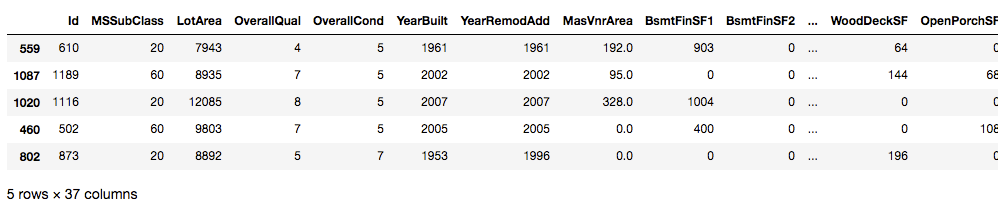

In [5]:
splitted_data["train"].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
355,390,60,12474,10,5,2007,2008,272.0,1280,0,...,196,134,0,0,0,0,0,8,2008,426000
1316,1436,20,8400,6,9,1962,2005,237.0,0,0,...,0,36,0,0,0,0,0,7,2008,174000
133,147,30,6120,5,7,1931,1993,0.0,209,0,...,48,0,0,0,0,0,0,11,2009,105000
181,202,20,10125,6,6,1977,1977,0.0,641,279,...,238,83,0,0,0,0,0,2,2008,171500
1133,1240,20,9037,8,5,2006,2006,32.0,428,0,...,120,33,0,0,0,0,0,12,2007,265900


### Ожидаемые результаты:

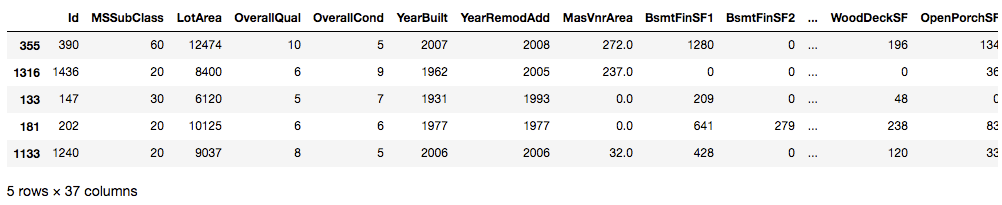

4. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

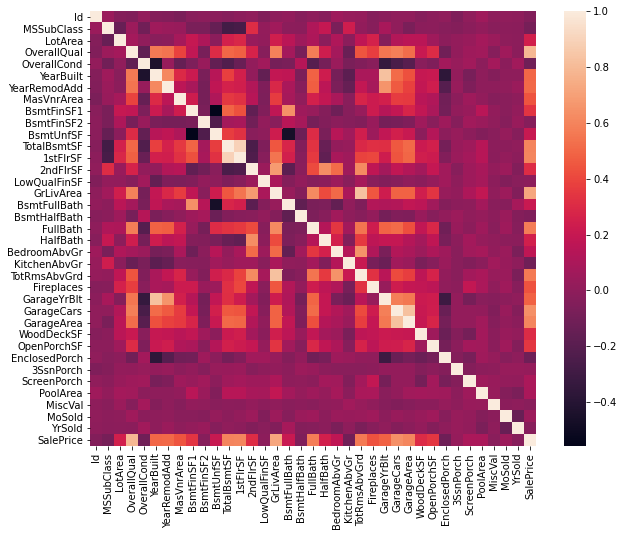

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Начало вашего кода 
plt.figure(figsize=(10,8))
sns.heatmap(splitted_data["train"].corr());
#Конец вашего кода

### Ожидаемые результаты:

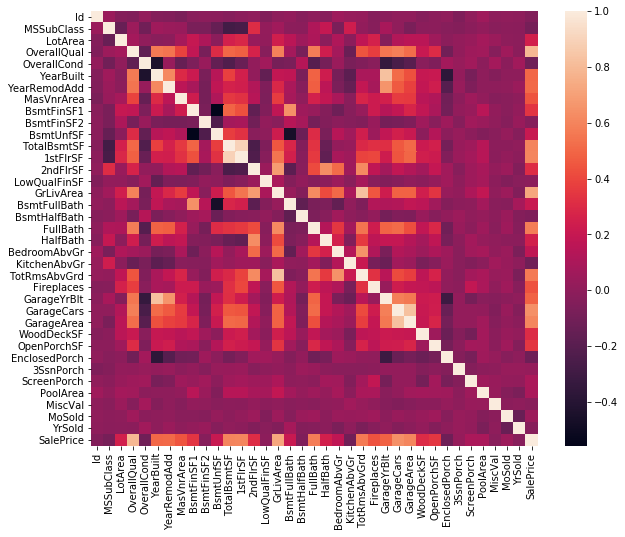

5. Теперь выберите топ 5 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь распечатайте таблицу, содержащую коэффициенты корреляции этих параметров (переменных)

In [7]:
#Начало вашего кода 
important = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF']
splitted_data['train'][['SalePrice' , 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF']].corr()
#Конец вашего кода

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF
SalePrice,1.000000,0.790700,0.720251,0.644677,0.610443,0.606605
OverallQual,0.790700,1.000000,0.589688,0.584686,0.523754,0.482587
GrLivArea,0.720251,0.589688,1.000000,0.488214,0.483841,0.545485
GarageCars,0.644677,0.584686,0.488214,1.000000,0.828212,0.444036
GarageArea,0.610443,0.523754,0.483841,0.828212,1.000000,0.499783
1stFlrSF,0.606605,0.482587,0.545485,0.444036,0.499783,1.000000


### Ожидаемые результаты:


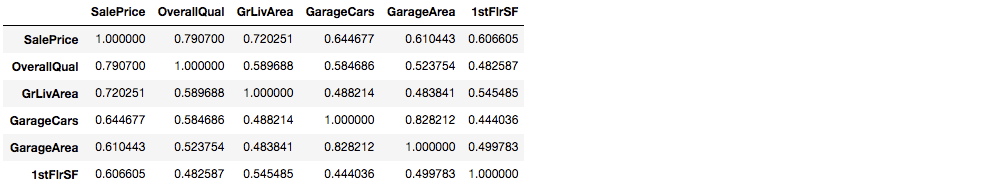

6. Теперь пришло время использовать модель **множественной** линейной регрессии для параметров в списке ```important``` для прогнозирования ```SalePrice```. Пожалуйста, реализуйте функцию ```train_multiple_lin_regressors(data, parameters, target="SalePrice")```, которая будет обучать модель линейной регрессии для ```n``` параметров из списка ```parameters```. Функция должна возвращать обученную модель **множественной** линейной регрессии.

In [8]:
#Начало вашего кода 
from sklearn.linear_model import LinearRegression
def train_multiple_lin_regressors(data, parameters, target="SalePrice"):
    regressor = LinearRegression()
    regressor.fit(data[parameters].values, data[target].values)
    return regressor
#Конец вашего кода

multiple_regressor = train_multiple_lin_regressors(splitted_data["train"], important, target="SalePrice")

7. Спрогнозируйте ```"SalePrice"``` для набора данных ```validation``` с использованием обученной модели множественной линейной регрессии. Пожалуйста, реализуйте функцию ```validation(regressors, data, target="SalePrice")```, которая будет принимать обученную модель множественной линейной регрессии ```regressor```, данные ```validation``` и параметр ```target```, который должен быть предсказан. Функция должна возвращать ```DataFrame``` с первым столбцом, который будет истинным ```"SalePrice"```,  а второй столбцец предсказан моделью множественной линейной регрессии.

In [9]:
#Начало вашего кода
def validation(regressors, data, parameters,  target="SalePrice"):
    res = pd.DataFrame()
    res[target] = data[target]
    res['-'.join(parameters)] = regressors.predict(data[parameters].values)
    res['-'.join(parameters)] = res['-'.join(parameters)].astype('int32')
    return res
#Конец вашего кода

pd_predictions = validation(multiple_regressor, splitted_data["validation"], important, target="SalePrice")
pd_predictions

,SalePrice,OverallQual-GrLivArea-GarageCars-GarageArea-1stFlrSF
559,118500,83211
1087,195000,204257
1020,318000,287194
460,226700,212371
802,116000,120477
...,...,...
120,150750,155779
759,189000,213658
248,139000,181441
991,187500,165121


### Ожидаемые результаты:

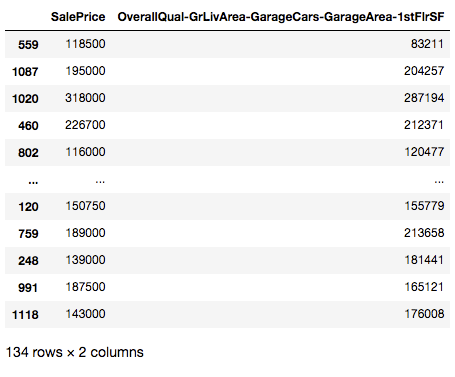

8. Используя функции ```rmse```, просчитайте ошибку предсказании модели множественной линейной регрессии. Кроме того, нанесите график, как показано ниже, с осью Y, которая представляет прогнозируемую ```"SalePrice"```, и осью X, представляющей истинную ```"SalePrice"```. Примечание: ```figsize=(10,7)```, ```style="darkgrid"```, ```context="talk"```.

Text(0.5, 1.0, 'Truth VS Predictions with RMSE 52872.21')

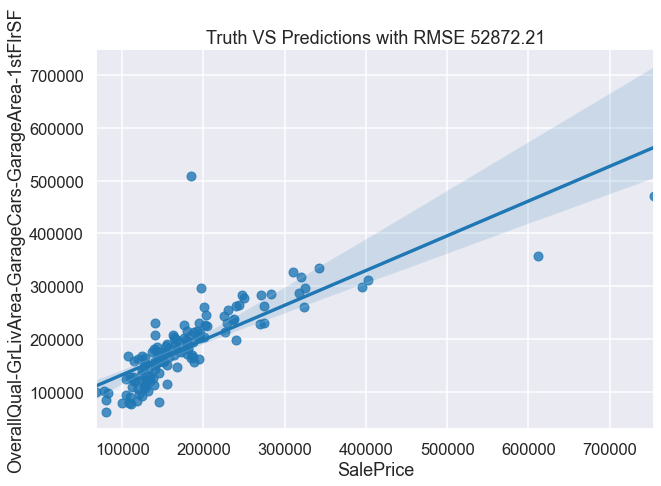

In [10]:
#Начало вашего кода 
r = rmse(pd_predictions['SalePrice'] , pd_predictions['OverallQual-GrLivArea-GarageCars-GarageArea-1stFlrSF'])
plt.figure(figsize=(10,7));
sns.set_style("darkgrid")
sns.set_context('talk')
sns.regplot(x = 'SalePrice' , y = 'OverallQual-GrLivArea-GarageCars-GarageArea-1stFlrSF', data = pd_predictions);
plt.title(f'Truth VS Predictions with RMSE {round(r, 2)}')
#Конец вашего кода

### Ожидаемые результаты:

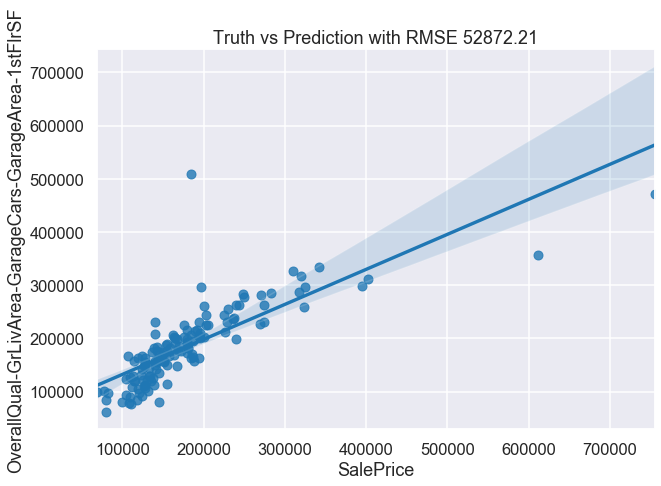

9. Теперь используйте топ-5 наиболее коррелированных столбцов ```important``` с ```"SalePrice"``` и постройте и обучите все возможные модели множественной линейной регрессии, используя два столбца.

In [11]:
regressors = {}
#Начало вашего кода 
for i in important:
    for j in important:
        if i != j:
            regressors['-'.join([i,j])] = train_multiple_lin_regressors(splitted_data["train"], [i,j], target="SalePrice") 
            
#Конец вашего кода
print(regressors)

{'OverallQual-GrLivArea': LinearRegression(), 'OverallQual-GarageCars': LinearRegression(), 'OverallQual-GarageArea': LinearRegression(), 'OverallQual-1stFlrSF': LinearRegression(), 'GrLivArea-OverallQual': LinearRegression(), 'GrLivArea-GarageCars': LinearRegression(), 'GrLivArea-GarageArea': LinearRegression(), 'GrLivArea-1stFlrSF': LinearRegression(), 'GarageCars-OverallQual': LinearRegression(), 'GarageCars-GrLivArea': LinearRegression(), 'GarageCars-GarageArea': LinearRegression(), 'GarageCars-1stFlrSF': LinearRegression(), 'GarageArea-OverallQual': LinearRegression(), 'GarageArea-GrLivArea': LinearRegression(), 'GarageArea-GarageCars': LinearRegression(), 'GarageArea-1stFlrSF': LinearRegression(), '1stFlrSF-OverallQual': LinearRegression(), '1stFlrSF-GrLivArea': LinearRegression(), '1stFlrSF-GarageCars': LinearRegression(), '1stFlrSF-GarageArea': LinearRegression()}


### Ожидаемые результаты:

```
{'OverallQual-GrLivArea': LinearRegression(), 'OverallQual-GarageCars': LinearRegression(), 'OverallQual-GarageArea': LinearRegression(), 'OverallQual-1stFlrSF': LinearRegression(), 'GrLivArea-OverallQual': LinearRegression(), 'GrLivArea-GarageCars': LinearRegression(), 'GrLivArea-GarageArea': LinearRegression(), 'GrLivArea-1stFlrSF': LinearRegression(), 'GarageCars-OverallQual': LinearRegression(), 'GarageCars-GrLivArea': LinearRegression(), 'GarageCars-GarageArea': LinearRegression(), 'GarageCars-1stFlrSF': LinearRegression(), 'GarageArea-OverallQual': LinearRegression(), 'GarageArea-GrLivArea': LinearRegression(), 'GarageArea-GarageCars': LinearRegression(), 'GarageArea-1stFlrSF': LinearRegression(), '1stFlrSF-OverallQual': LinearRegression(), '1stFlrSF-GrLivArea': LinearRegression(), '1stFlrSF-GarageCars': LinearRegression(), '1stFlrSF-GarageArea': LinearRegression()}
```

10. Теперь оцените все обученные двухпараметрические модели линейной регрессии ```regressors```  с использованием набора данных ```validation``` и верните ```DataFrame``` в формате, указанном ниже.

In [12]:
#Начало вашего кода 
models_predictions =  pd.DataFrame()
models_predictions['SalePrice'] = splitted_data["validation"]['SalePrice']
for i in regressors:
    val = validation(regressors[i], splitted_data["validation"], i.split('-'), target="SalePrice")
    models_predictions[i] = val[i]
#Конец вашего кода
models_predictions

,SalePrice,OverallQual-GrLivArea,OverallQual-GarageCars,OverallQual-GarageArea,OverallQual-1stFlrSF,GrLivArea-OverallQual,GrLivArea-GarageCars,GrLivArea-GarageArea,GrLivArea-1stFlrSF,GarageCars-OverallQual,...,GarageCars-GarageArea,GarageCars-1stFlrSF,GarageArea-OverallQual,GarageArea-GrLivArea,GarageArea-GarageCars,GarageArea-1stFlrSF,1stFlrSF-OverallQual,1stFlrSF-GrLivArea,1stFlrSF-GarageCars,1stFlrSF-GarageArea
559,118500,83995,75443,75328,93608,83995,105443,110628,135791,75443,...,115776,125590,75328,110628,115776,134493,93608,135791,125590,134493
1087,195000,220251,220323,215747,196385,220251,203484,196416,176589,220323,...,193332,166825,215747,196416,193332,157552,196385,176589,166825,157552
1020,318000,257623,291240,302462,288278,257623,256575,264007,238512,291240,...,291287,297137,302462,264007,291287,304627,288278,238512,297137,304627
460,226700,226625,220323,228021,198467,226625,212199,221016,187822,220323,...,204386,169657,228021,221016,204386,178988,198467,187822,169657,178988
802,116000,109977,146360,130577,124715,109977,142960,122207,118452,146360,...,185393,173216,130577,122207,185393,150644,124715,118452,173216,150644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,150750,134588,146360,154009,149517,134588,176611,186897,179210,146360,...,206496,206954,154009,186897,206496,220103,149517,179210,206954,220103
759,189000,206913,220323,219540,232250,206913,185246,182210,194801,220323,...,196748,215611,219540,182210,196748,212435,232250,194801,215611,212435
248,139000,185594,149406,160274,205842,185594,154105,172195,223650,149406,...,123514,174376,160274,172195,123514,196640,205842,223650,174376,196640
991,187500,177685,183341,168197,149874,177685,190410,170944,154342,183341,...,184891,155498,168197,170944,184891,131953,149874,154342,155498,131953


Ожидаемые результаты:

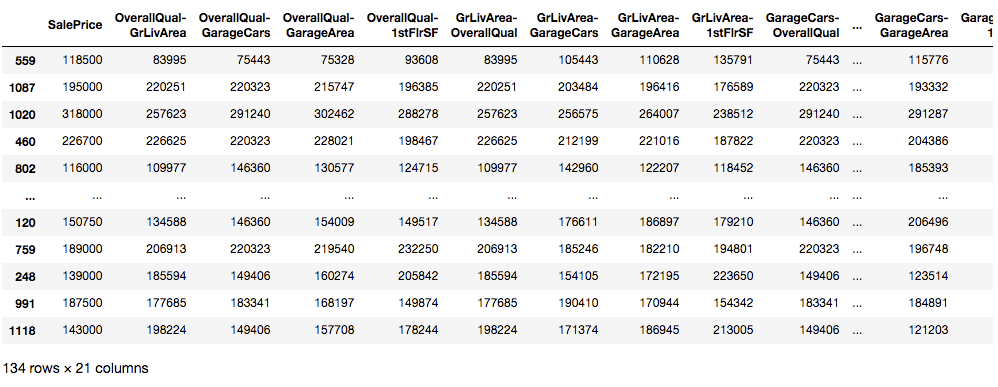

11. Теперь вычислите значение rmse для каждого столбца ```models_predictions```.

In [13]:
rmse_errors = {}
#Начало вашего кода 
for i in regressors:
    rmse_errors[i] = rmse(models_predictions['SalePrice'], models_predictions[i])
    
for key in rmse_errors:
    print(key, ' : ', round(rmse_errors[key], 2))
#Конец вашего кода

OverallQual-GrLivArea  :  56461.25
OverallQual-GarageCars  :  58221.88
OverallQual-GarageArea  :  57561.33
OverallQual-1stFlrSF  :  55089.53
GrLivArea-OverallQual  :  56461.25
GrLivArea-GarageCars  :  59569.17
GrLivArea-GarageArea  :  60237.54
GrLivArea-1stFlrSF  :  64048.1
GarageCars-OverallQual  :  58221.88
GarageCars-GrLivArea  :  59569.17
GarageCars-GarageArea  :  69265.66
GarageCars-1stFlrSF  :  61879.34
GarageArea-OverallQual  :  57561.33
GarageArea-GrLivArea  :  60237.54
GarageArea-GarageCars  :  69265.66
GarageArea-1stFlrSF  :  64761.04
1stFlrSF-OverallQual  :  55089.53
1stFlrSF-GrLivArea  :  64048.1
1stFlrSF-GarageCars  :  61879.34
1stFlrSF-GarageArea  :  64761.04


Ожидаемые результаты:

```
OverallQual-GrLivArea  : 56461.25
OverallQual-GarageCars : 58221.88
OverallQual-GarageArea : 57561.33
OverallQual-1stFlrSF   : 55089.53
GrLivArea-OverallQual  : 56461.25
GrLivArea-GarageCars   : 59569.17
GrLivArea-GarageArea   : 60237.54
GrLivArea-1stFlrSF     : 64048.10
GarageCars-OverallQual : 58221.88
GarageCars-GrLivArea   : 59569.17
GarageCars-GarageArea  : 69265.66
GarageCars-1stFlrSF    : 61879.34
GarageArea-OverallQual : 57561.33
GarageArea-GrLivArea   : 60237.54
GarageArea-GarageCars  : 69265.66
GarageArea-1stFlrSF    : 64761.04
1stFlrSF-OverallQual   : 55089.53
1stFlrSF-GrLivArea     : 64048.10
1stFlrSF-GarageCars    : 61879.34
1stFlrSF-GarageArea    : 64761.04
```

12. Теперь проведите дополнительный анализ обученных моделей (таких как визуализация, изучение коэффициентов корреляции) и дайте свое мнение, почему RMSE является высокой.

<AxesSubplot:>

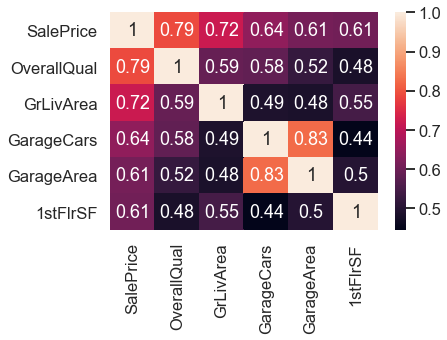

In [19]:
#Начало вашего кода 
corr = splitted_data['train'][['SalePrice' , 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF']].corr()
sns.heatmap(corr, annot = True)

# Я думаю RMSE является высокой потому что остальные данные не так сильно коррелируют с SalePrice. 
# Самые низкие RMSE у параметров которые наиболее коррелируют. Например RMSE в парах параметра OverallQual наиболее низкие,
# по сравнению с другими параметрами
#Конец вашего кода

### Отличная работа